In [2]:
from deepface import DeepFace
import torchvision
torchvision.__version__
import cv2
import matplotlib.pyplot as plt
import numpy as np
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch


2024-05-06 19:25:07.243725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 19:25:08.441777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
og = cv2.imread("ffhq256_pp/test/images/69000.png")
# mod0 = cv2.imread("warped_dataset/160_1_0/test/images/69000.png")
mod1 = cv2.imread("warped_dataset/20_1_0/test/images/69000.png")
mod2 = cv2.imread("warped_dataset/20_3_0/test/images/69000.png")
mod3 = cv2.imread("warped_dataset/20_3_15/test/images/69000.png")
mod4 = cv2.imread("warped_dataset/50_1_0/test/images/69000.png")
mod5 = cv2.imread("warped_dataset/0_0_0/test/images/00000.png")
og_emb = np.load("ffhq256_pp/test/embeddings/69000.npy")

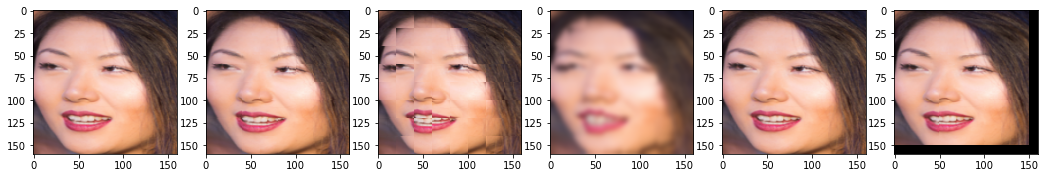

In [4]:
fig, axs = plt.subplots(1, 6)
fig.set_size_inches(18, 6)
axs[0].imshow(cv2.cvtColor(og, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(mod1, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(mod2, cv2.COLOR_BGR2RGB))
axs[3].imshow(cv2.cvtColor(mod3, cv2.COLOR_BGR2RGB))
axs[5].imshow(cv2.cvtColor(mod4, cv2.COLOR_BGR2RGB))
axs[4].imshow(cv2.cvtColor(mod5, cv2.COLOR_BGR2RGB))
plt.show()

assert np.allclose(og, mod5)

In [5]:
mtcnn = MTCNN(keep_all=True)
resnet = InceptionResnetV1(pretrained='vggface2').eval()


In [10]:
print("stored",og_emb[0][:10])

img = og.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = mtcnn(og)
img = img.reshape(1,3, 160, 160)
#convert to tensor
img = torch.tensor(img).float()
og_gen_emb = resnet(img).detach().numpy()
print("computed", og_gen_emb[0][:10]) # with, without mtcnn different, both different from stored

stored [ 0.06091812 -0.01521985  0.00623201  0.02378483  0.0092516   0.0071398
 -0.05966462  0.05227159  0.00726576 -0.03760012]
computed [ 0.0264013  -0.00569264 -0.02827928  0.02927333  0.02093192 -0.01552391
 -0.03907333  0.05916931 -0.00662757 -0.03424297]


In [12]:
print ("similarity", np.linalg.norm(og_emb-og_gen_emb))

similarity 0.47511414


In [8]:
train_img = cv2.imread("ffhq256_pp/train/images/00000.png")
warped_img = cv2.imread("warped_dataset/0_0_0/train/images/00000.png")

print(train_img - warped_img)

train_emb = np.load("ffhq256_pp/train/embeddings/00000.npy")

img = train_img.copy()
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.reshape(1,3, 160, 160)
#convert to tensor
img = torch.tensor(img).float()
train_gen_emb = resnet(img).detach().numpy()
print(train_emb[0][:10])
print(train_gen_emb[0][:10])

train_stored_emb = np.load("warped_dataset/0_0_0/train/embeddings/00000.npy")
print(train_stored_emb[0][:10])

[[[ 47  65  60]
  [ 42  63  58]
  [ 42  64  59]
  ...
  [233 216 160]
  [236 216 152]
  [ 16 247 147]]

 [[ 47  64  61]
  [ 47  63  61]
  [ 48  66  65]
  ...
  [227 209 154]
  [224 205 147]
  [235 213 143]]

 [[ 48  63  61]
  [ 50  65  64]
  [ 54  69  68]
  ...
  [236 212 152]
  [230 207 147]
  [223 200 141]]

 ...

 [[102 125  28]
  [ 90 115  15]
  [ 82 107   5]
  ...
  [106 129  96]
  [103 122  85]
  [ 99 118  78]]

 [[123 125  29]
  [112 115  19]
  [105 107  12]
  ...
  [ 85 136 108]
  [102 135 103]
  [105 124  89]]

 [[114 117  17]
  [106 106   7]
  [101 101   1]
  ...
  [ 76 140 116]
  [ 81 139 113]
  [ 94 138 107]]]


[-0.01464448 -0.01126644 -0.02469929  0.02479864  0.01822592 -0.01399038
  0.01981576 -0.03284699  0.00140275  0.05803061]
[ 0.04386001 -0.01041156 -0.08392095  0.02621224 -0.04792715  0.01217649
  0.06017672  0.00073354 -0.06102898  0.03077531]
[ 0.02124383 -0.02522259 -0.02711233  0.03628537 -0.01335114  0.01275236
  0.05025648 -0.04109637 -0.04618641  0.00321718]


In [9]:
assert np.allclose(og_emb, og_gen_emb, atol=1e-6)

AssertionError: 

In [ ]:
print(og_gen_emb)

In [ ]:
DeepFace.verify(og, mod5, model_name="Facenet", distance_metric="euclidean", enforce_detection=False)

In [ ]:
DeepFace.verify(og, mod0, model_name="ArcFace", distance_metric="cosine", enforce_detection=False)

In [ ]:
DeepFace.verify(og, mod1, model_name="ArcFace", distance_metric="cosine", enforce_detection=False)

In [ ]:
DeepFace.verify(og, mod2, model_name="ArcFace", distance_metric="cosine", enforce_detection=False)

In [ ]:
DeepFace.verify(og, mod3, model_name="ArcFace", distance_metric="cosine", enforce_detection=False)

In [ ]:
DeepFace.verify(og, mod4, model_name="ArcFace", distance_metric="cosine", enforce_detection=False)

In [ ]:
# calculate embeddings
